In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
 conda install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [3]:
import sklearn

In [1]:
import pandas as pd

In [16]:
# Ruta del archivo
ruta = r'C:\Users\letic\Downloads\online+retail+ii\online_retail_II.xlsx'

# Leer todas las hojas
xls = pd.ExcelFile(ruta)

# Mostrar los nombres de las hojas
print(xls.sheet_names)

['Year 2009-2010', 'Year 2010-2011']


In [144]:
# Leer cada hoja
df1 = pd.read_excel(xls, sheet_name='Year 2009-2010')
df2 = pd.read_excel(xls, sheet_name='Year 2010-2011')

# Unirlas
df_unificado = pd.concat([df1, df2], ignore_index=True)

# Ver las primeras filas
df_unificado.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom

In [145]:
df_unificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [146]:
df_unificado.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [10]:
#df_unificado.to_csv('online_retail_unificado.csv', index=False)

In [147]:
###Limpieza antes de guardarlo como db###
# Eliminar filas con Description nula
df_unificado = df_unificado.dropna(subset=['Description'])

# Eliminar filas sin Customer ID 
df_unificado = df_unificado.dropna(subset=['Customer ID'])

# Eliminar posibles filas con cantidad o precio cero o negativos
df_unificado = df_unificado[(df_unificado['Quantity'] > 0) & (df_unificado['Price'] > 0)]

# Eliminar duplicados
df_unificado = df_unificado.drop_duplicates()

# Confirmar tamaño final
df_unificado.info()





<class 'pandas.core.frame.DataFrame'>
Int64Index: 779425 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      779425 non-null  object        
 1   StockCode    779425 non-null  object        
 2   Description  779425 non-null  object        
 3   Quantity     779425 non-null  int64         
 4   InvoiceDate  779425 non-null  datetime64[ns]
 5   Price        779425 non-null  float64       
 6   Customer ID  779425 non-null  float64       
 7   Country      779425 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 53.5+ MB


In [148]:
# Crear columna TotalAmount: valor total de cada línea de factura (cantidad × precio unitario)
df_unificado['TotalAmount'] = df_unificado['Quantity'] * df_unificado['Price']
df_unificado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 779425 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      779425 non-null  object        
 1   StockCode    779425 non-null  object        
 2   Description  779425 non-null  object        
 3   Quantity     779425 non-null  int64         
 4   InvoiceDate  779425 non-null  datetime64[ns]
 5   Price        779425 non-null  float64       
 6   Customer ID  779425 non-null  float64       
 7   Country      779425 non-null  object        
 8   TotalAmount  779425 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 59.5+ MB


In [23]:
#guardar con formato sqlite
import sqlite3

# Crear conexión a base de datos SQLite (se crea en disco)
conn = sqlite3.connect('online_retail_unificado.db')

# Guardar el dataframe como tabla
df_unificado.to_sql('retail', conn, if_exists='replace', index=False)

# Cerrar conexión
conn.close()


In [149]:
conn = sqlite3.connect('online_retail_unificado.db')
df = pd.read_sql('SELECT * FROM retail', conn)
conn.close()

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de gráficos
sns.set(style="whitegrid")

# Conectar a la base de datos
conn = sqlite3.connect("online_retail_unificado.db")

# Cargar tabla completa
df = pd.read_sql("SELECT * FROM retail", conn)

# Verificar estructura
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779425 entries, 0 to 779424
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      779425 non-null  int64  
 1   StockCode    779425 non-null  object 
 2   Description  779425 non-null  object 
 3   Quantity     779425 non-null  int64  
 4   InvoiceDate  779425 non-null  object 
 5   Price        779425 non-null  float64
 6   Customer ID  779425 non-null  float64
 7   Country      779425 non-null  object 
 8   TotalAmount  779425 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 53.5+ MB


In [151]:
# Datos faltantes
# Convertir fechas
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Crear columna con solo la fecha (sin hora)
df['Date'] = df['InvoiceDate'].dt.date


In [172]:
##Guardar una versión limpia de la bd--usar en parte de predicción.
name_archivo = 'Online_retail_new.csv'
df.to_csv(name_archivo, index=False)

In [175]:
##EDA: enfoque a producto
productos_top = df['Description'].value_counts().head(10).index
df_top_productos = df[df['Description'].isin(productos_top)]

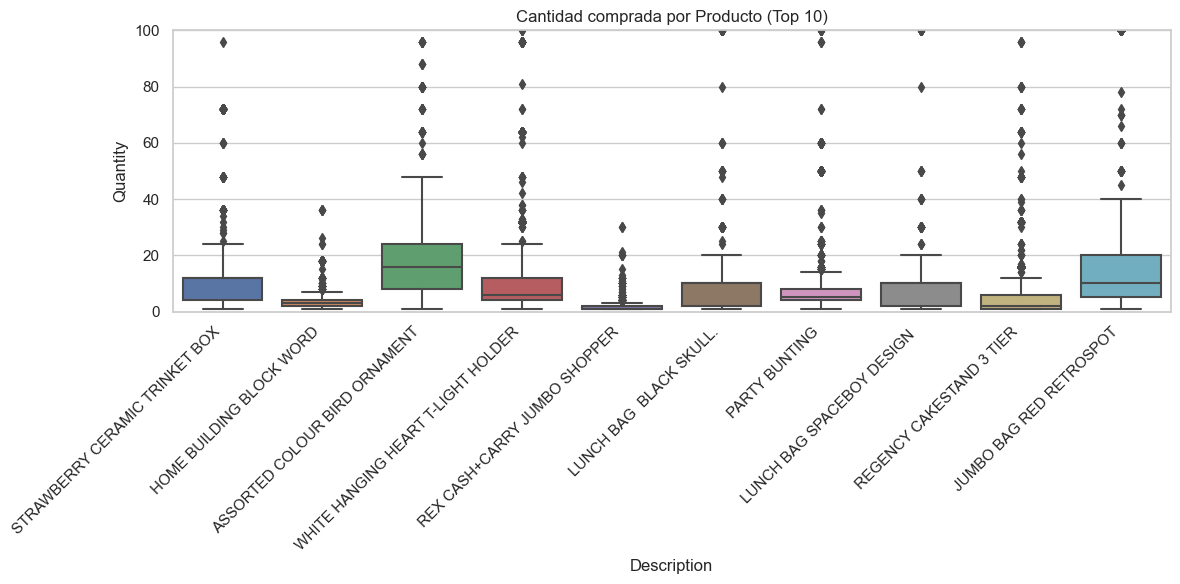

In [176]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Description', y='Quantity', data=df_top_productos)
plt.ylim(0, 100)
plt.title("Cantidad comprada por producto (Top 10)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<Figure size 1400x600 with 0 Axes>

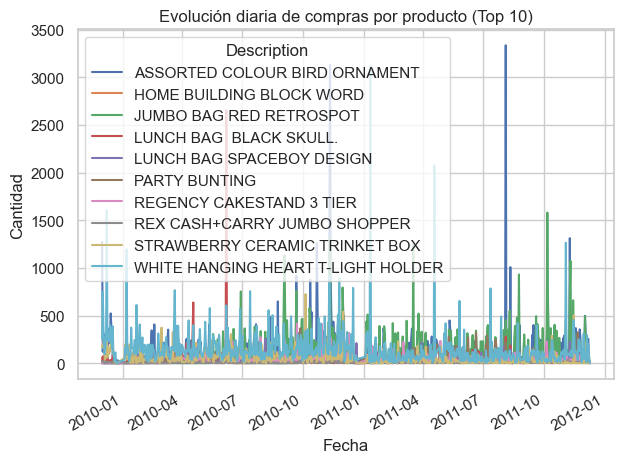

In [187]:
# Comportamiento de compra en el tiempo
# Elegimos los top productos más vendidos
top_10_productos = df['Description'].value_counts().head(10).index
df_top_10 = df[df['Description'].isin(top_10_productos)]

# Agrupar por día y producto
ventas_diarias = df_top_10.groupby([pd.Grouper(key='InvoiceDate', freq='D'), 'Description'])['Quantity'].sum().reset_index()

# Pivot para graficar
pivot_ventas = ventas_diarias.pivot(index='InvoiceDate', columns='Description', values='Quantity').fillna(0)

# Graficar
plt.figure(figsize=(14, 6))
pivot_ventas.plot()
plt.title("Evolución diaria de compras por producto (Top 10)")
plt.xlabel("Fecha")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

<Figure size 4000x1000 with 0 Axes>

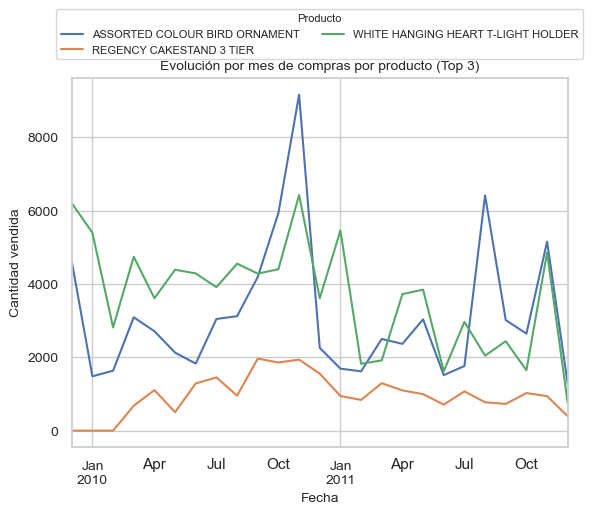

In [288]:
###
###Evolución de la compra mensual del top 3 de los productos
# Seleccionar top 3 productos más vendidos
top_3_productos = df['Description'].value_counts().head(3).index
df_top_3 = df[df['Description'].isin(top_3_productos)]

# Agrupar por MES y producto
ventas_mensuales = df_top_3.groupby([pd.Grouper(key='InvoiceDate', freq='M'), 'Description'])['Quantity'].sum().reset_index()

# Pivot para graficar
pivot_mensual = ventas_mensuales.pivot(index='InvoiceDate', columns='Description', values='Quantity').fillna(0)

# Graficar
plt.figure(figsize=(40, 10))
pivot_mensual.plot()
plt.title("Evolución por mes de compras por producto (Top 3)", fontsize=10)
plt.xlabel("Fecha", fontsize=10)
plt.ylabel("Cantidad vendida", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Producto", fontsize=8, title_fontsize=8, bbox_to_anchor=(0.5, 1.2), loc='upper center', ncol=2)
#plt.tight_layout()
plt.show()

<Figure size 4000x1000 with 0 Axes>

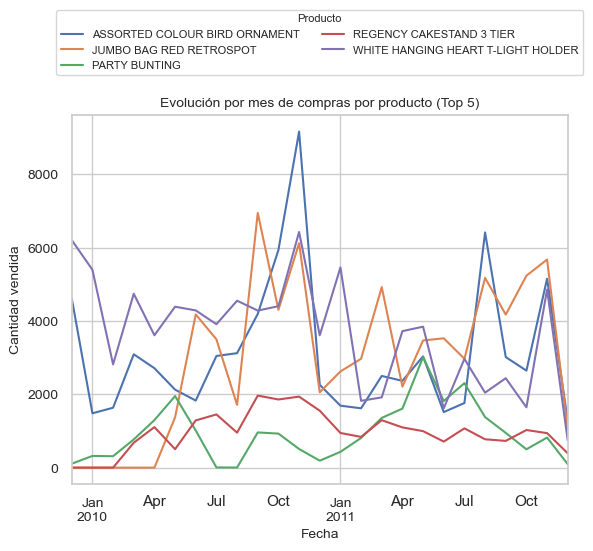

In [289]:
###Evolución de la compra mensual del top 5 de los productos
# Seleccionar top 5 productos más vendidos
top_5_productos = df['Description'].value_counts().head(5).index
df_top_5 = df[df['Description'].isin(top_5_productos)]

# Agrupar por MES y producto
ventas_mensuales = df_top_5.groupby([pd.Grouper(key='InvoiceDate', freq='M'), 'Description'])['Quantity'].sum().reset_index()

# Pivot para graficar
pivot_mensual = ventas_mensuales.pivot(index='InvoiceDate', columns='Description', values='Quantity').fillna(0)

# Graficar
plt.figure(figsize=(40, 10))
pivot_mensual.plot()
plt.title("Evolución por mes de compras por producto (Top 5)", fontsize=10)
plt.xlabel("Fecha", fontsize=10)
plt.ylabel("Cantidad vendida", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Producto", fontsize=8, title_fontsize=8, bbox_to_anchor=(0.5, 1.3), loc='upper center', ncol=2)
#plt.tight_layout()
plt.show()

<Figure size 4000x1000 with 0 Axes>

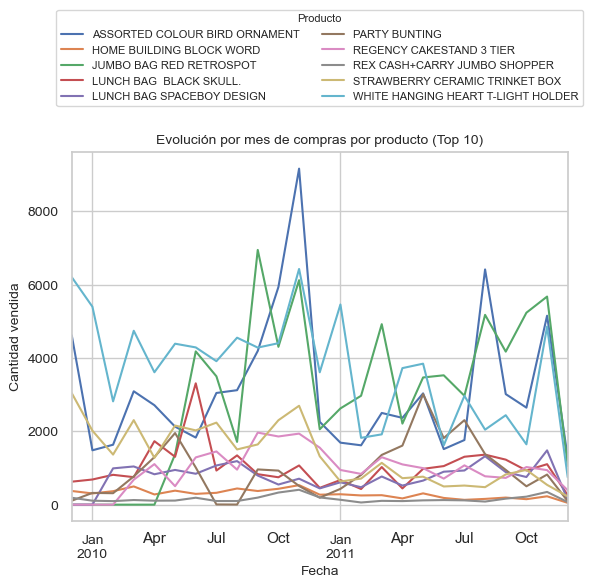

In [290]:
###Evolución de la compra mensual del top 10 de los productos
# Seleccionar top 10 productos más vendidos
top_10_productos = df['Description'].value_counts().head(10).index
df_top_10 = df[df['Description'].isin(top_10_productos)]

# Agrupar por MES y producto
ventas_mensuales = df_top_10.groupby([pd.Grouper(key='InvoiceDate', freq='M'), 'Description'])['Quantity'].sum().reset_index()

# Pivot para graficar
pivot_mensual = ventas_mensuales.pivot(index='InvoiceDate', columns='Description', values='Quantity').fillna(0)

# Graficar
plt.figure(figsize=(40, 10))
pivot_mensual.plot()
plt.title("Evolución por mes de compras por producto (Top 10)", fontsize=10)
plt.xlabel("Fecha", fontsize=10)
plt.ylabel("Cantidad vendida", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Producto", fontsize=8, title_fontsize=8, bbox_to_anchor=(0.5, 1.4), loc='upper center', ncol=2)
#plt.tight_layout()
plt.show()

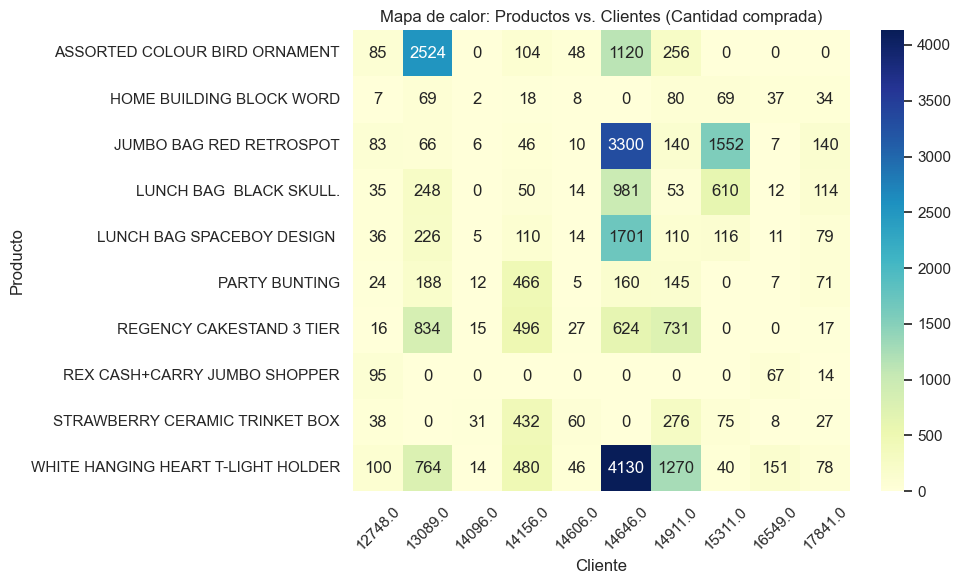

In [230]:
#Productos populares entre clientes
# Tabla cliente-producto con cantidad total
tabla = df.pivot_table(index='Description', columns='Customer ID', values='Quantity', aggfunc='sum', fill_value=0)

# Opcional: filtrar a top 10 productos y top 10 clientes para visualización más clara
top_10_prod = df['Description'].value_counts().head(10).index
top_10_cli = df['Customer ID'].value_counts().head(10).index
tabla_filtrada = tabla.loc[tabla.index.isin(top_10_prod), tabla.columns.isin(top_10_cli)]

# Mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(tabla_filtrada, cmap='YlGnBu', annot=True, fmt='.0f')
plt.xticks( rotation=45)
plt.title("Mapa de calor: Productos vs. Clientes (Cantidad comprada)")
plt.xlabel("Cliente")
plt.ylabel("Producto")
plt.tight_layout()
plt.show()

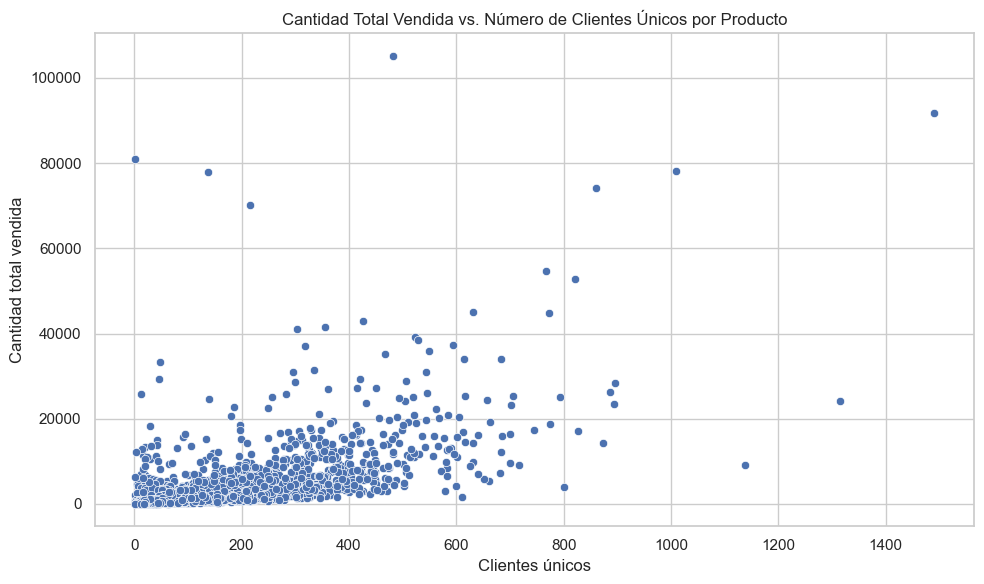

In [ ]:
#Dispersión de producto total vendido vs clientes únicos (producto popular y de alto volúmen)
# Agrupar para obtener métricas por producto
agrupado = df.groupby('Description').agg({
    'Quantity': 'sum',
    'Customer ID': pd.Series.nunique
}).rename(columns={'Quantity': 'Total_Vendido', 'Customer ID': 'Clientes_Unicos'})

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=agrupado, x='Clientes_Unicos', y='Total_Vendido')
plt.title("Cantidad Total Vendida vs. Número de Clientes Únicos por Producto")
plt.xlabel("Clientes únicos")
plt.ylabel("Cantidad total vendida")
plt.tight_layout()
plt.show()


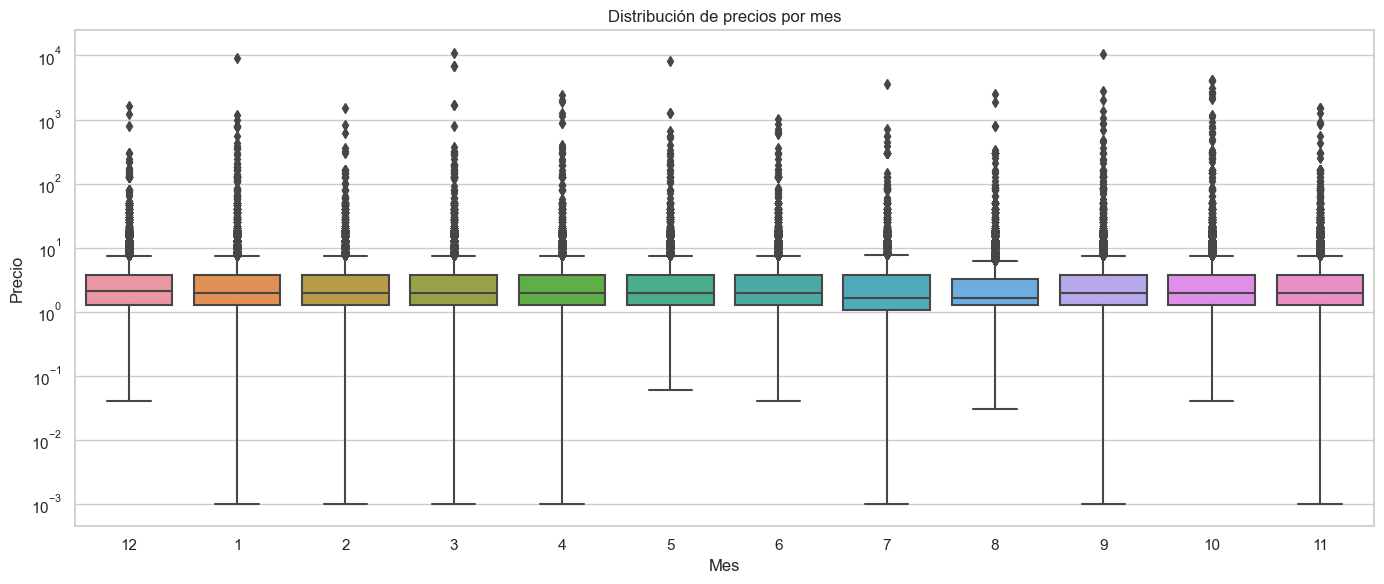

In [185]:
##Precio promedio en el tiempo
df['Mes_str'] = df['Mes'].astype(str)  #convertir columna mes(int) a str
precio_mensual = df.groupby('Fecha')['Price'].mean()

plt.figure(figsize=(14, 6))
sns.boxplot(x='Mes_str', y='Price', data=df)
plt.yscale('log')  # Opcional, si hay precios muy altos
plt.title('Distribución de precios por mes')
plt.xlabel('Mes')
plt.ylabel('Precio')
plt.tight_layout()
plt.show()


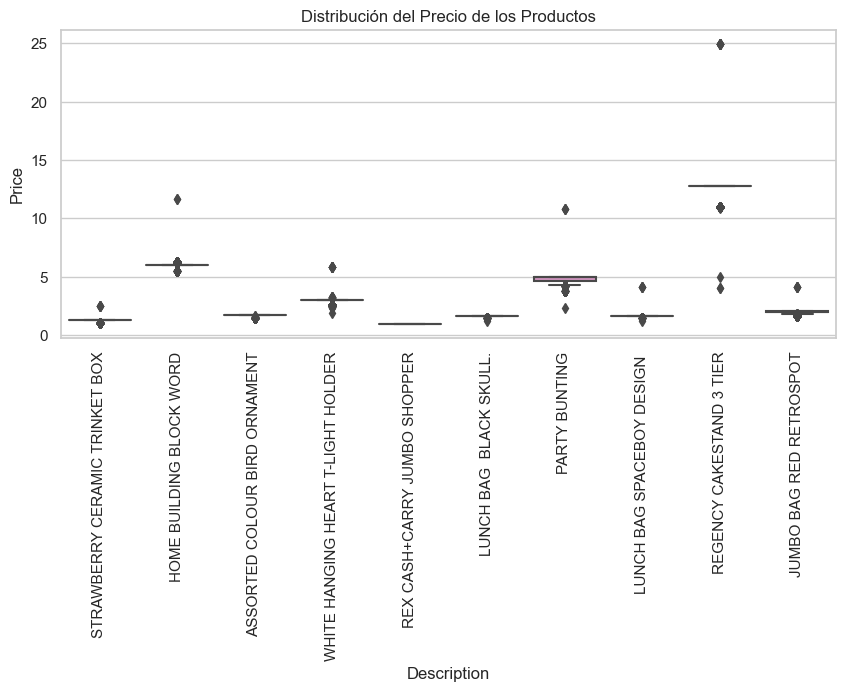

In [236]:
#Variables claves --Distribución del precio (Price) de los 10 productos mas vendidos
plt.figure(figsize=(10, 4))
#sns.histplot(df['Price'], kde=True)
#df['Price'].hist()
sns.boxplot(x=('Description'), y=('Price'),data=df_top_10)
plt.xticks( rotation=90)

plt.title("Distribución del Precio de los Productos")
#plt.xlim(0, 100)
plt.show()

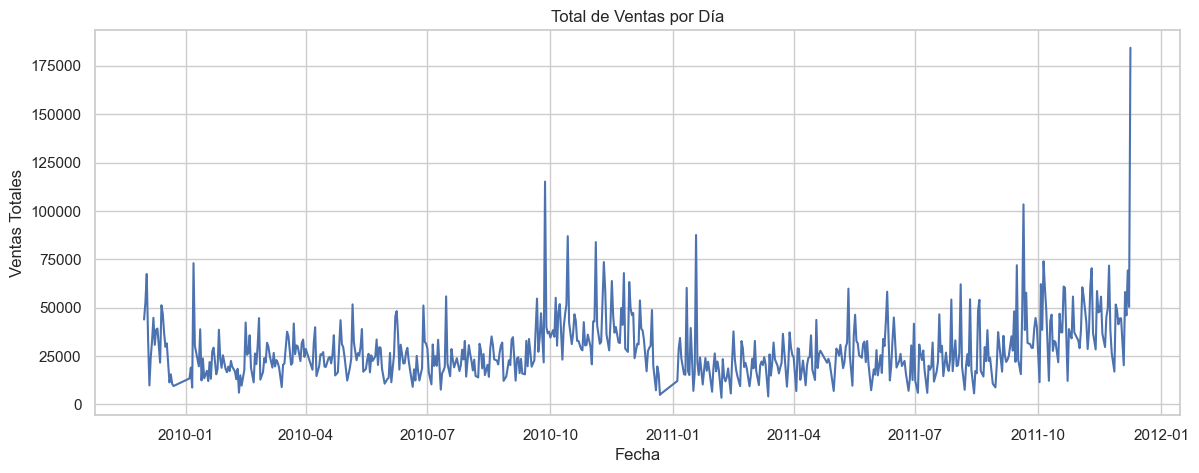

In [30]:
#Variables clave---ventas totales por día
ventas_diarias = df.groupby('Date')['TotalAmount'].sum()

plt.figure(figsize=(14, 5))
ventas_diarias.plot()
plt.title("Total de Ventas por Día")
plt.xlabel("Fecha")
plt.ylabel("Ventas Totales")
plt.grid(True)
plt.show()

In [64]:
len (df['StockCode'].unique())#cantidad de productos

4631

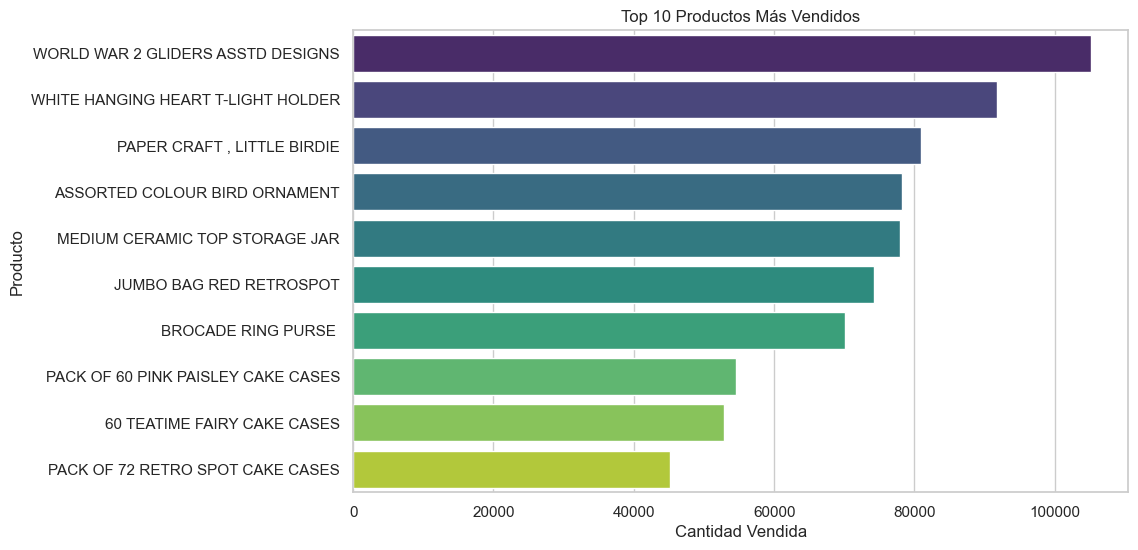

In [31]:
#variables clave--productos más vendidos
top_productos = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_productos.values, y=top_productos.index, palette="viridis")
plt.title("Top 10 Productos Más Vendidos")
plt.xlabel("Cantidad Vendida")
plt.ylabel("Producto")
plt.show()

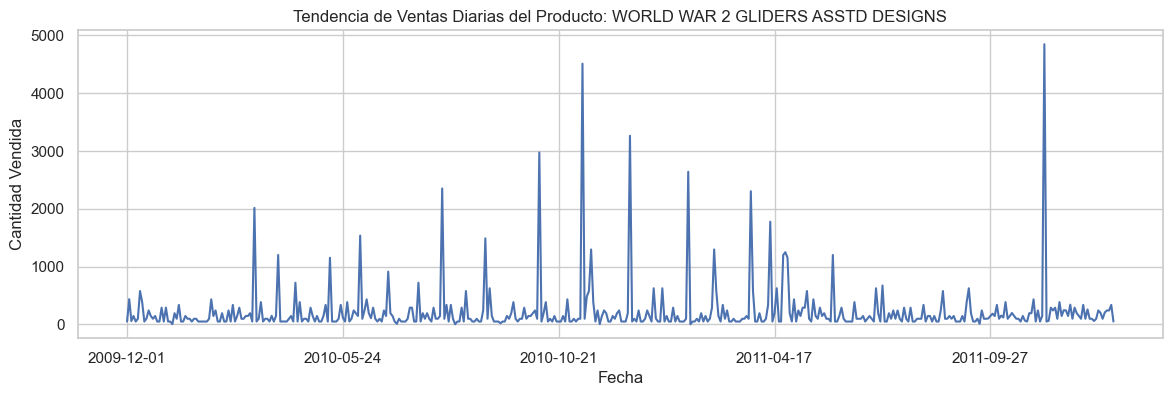

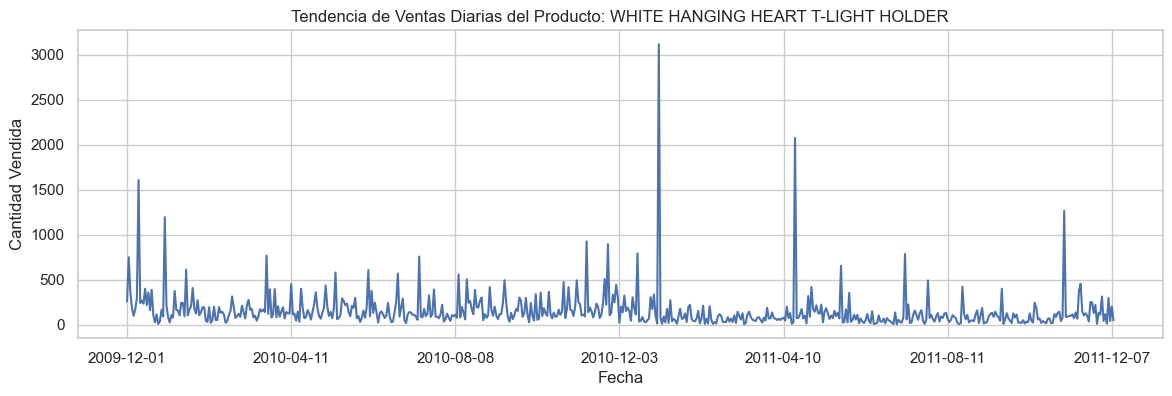

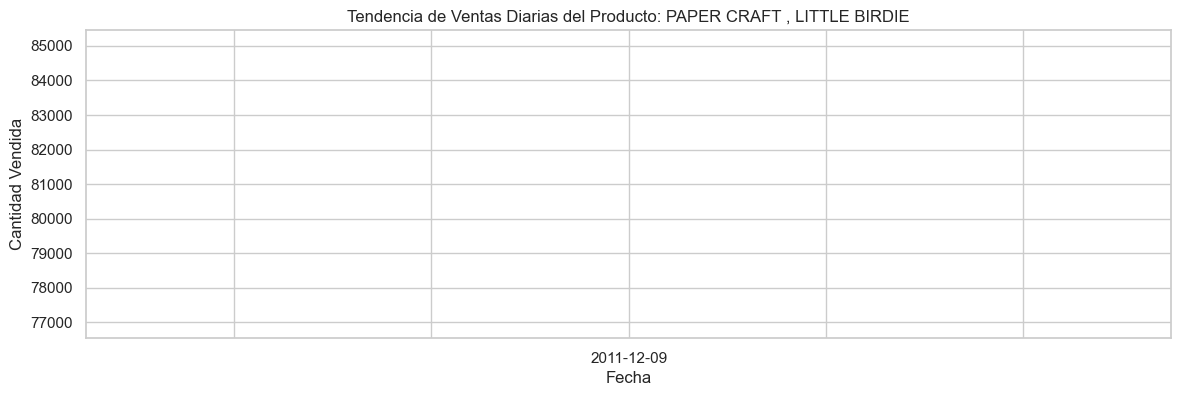

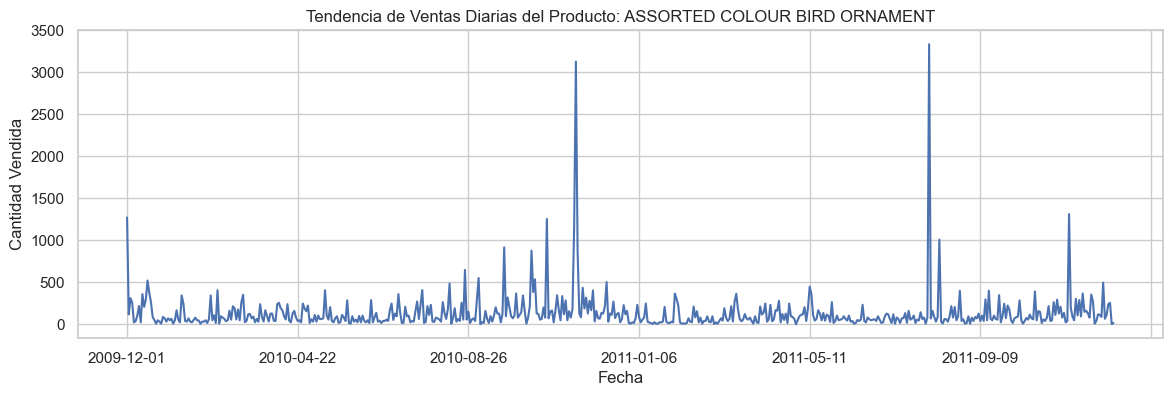

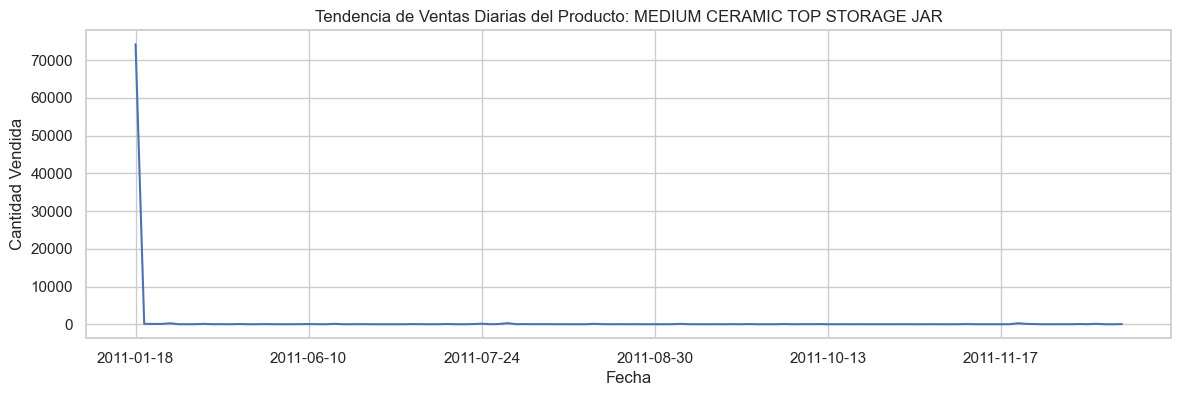

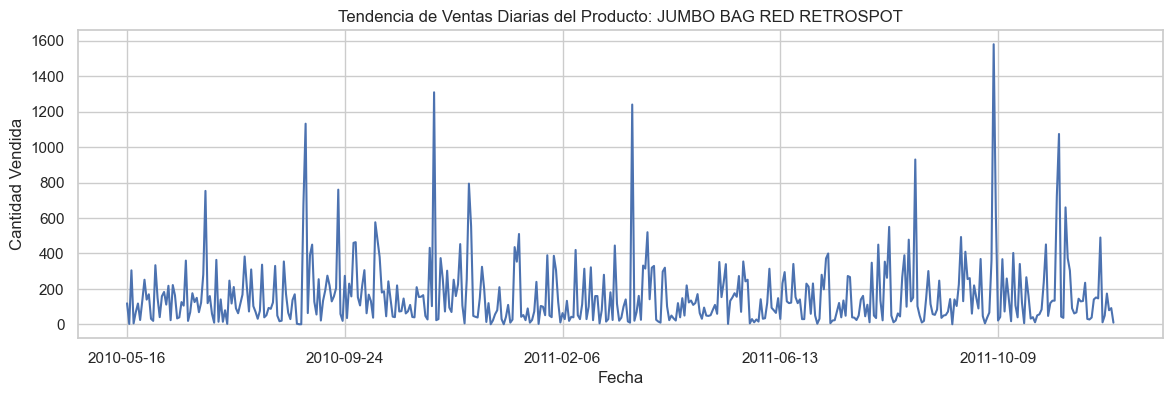

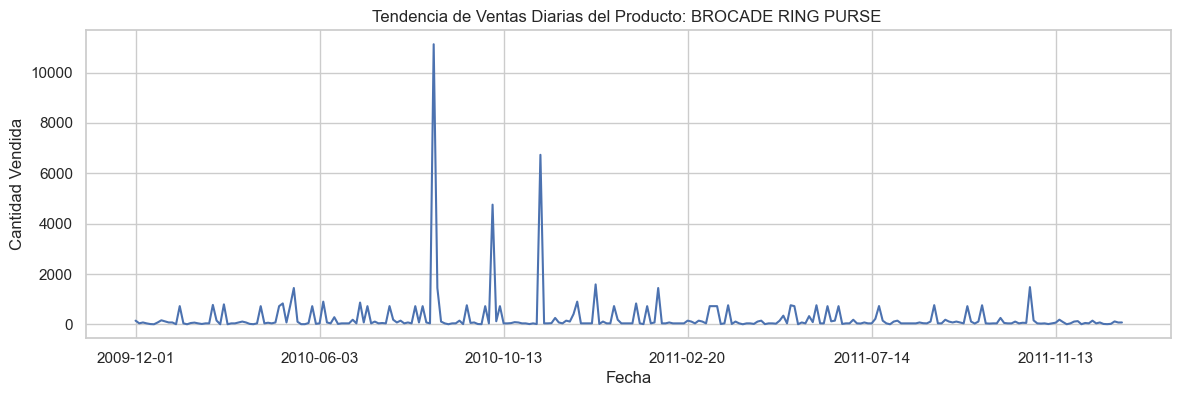

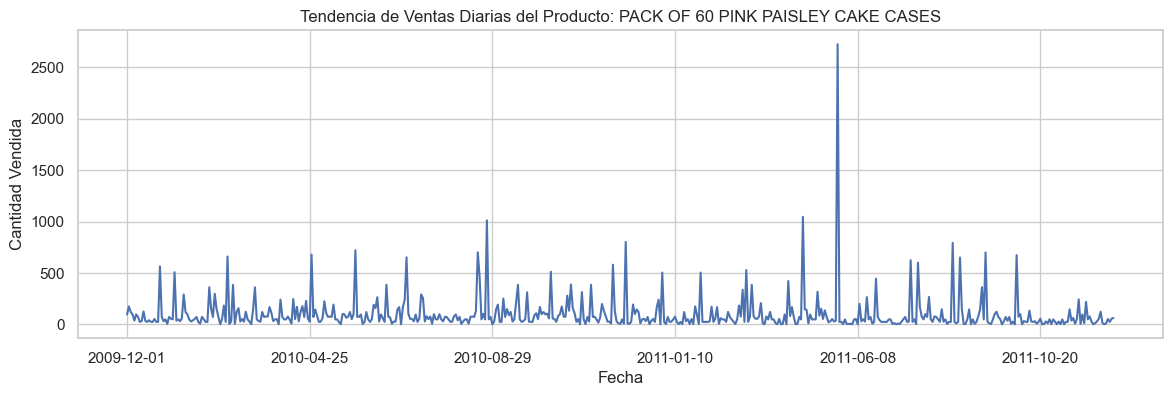

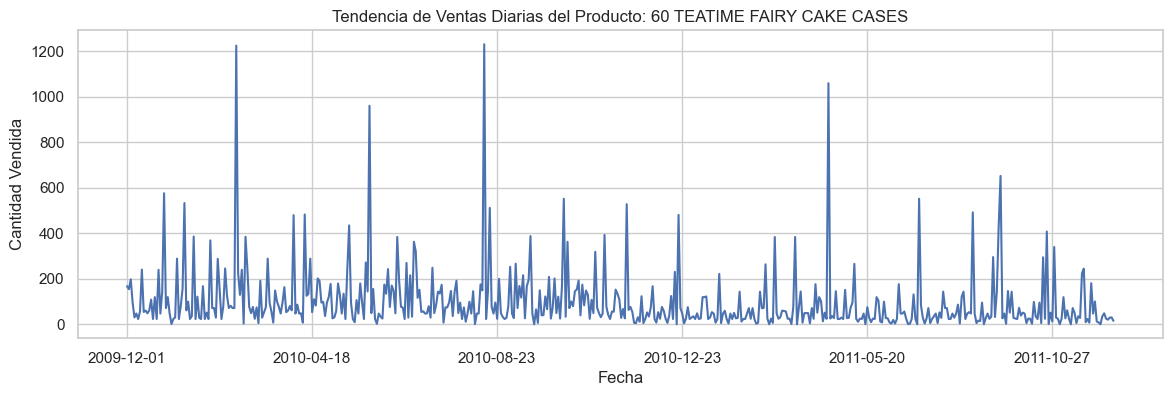

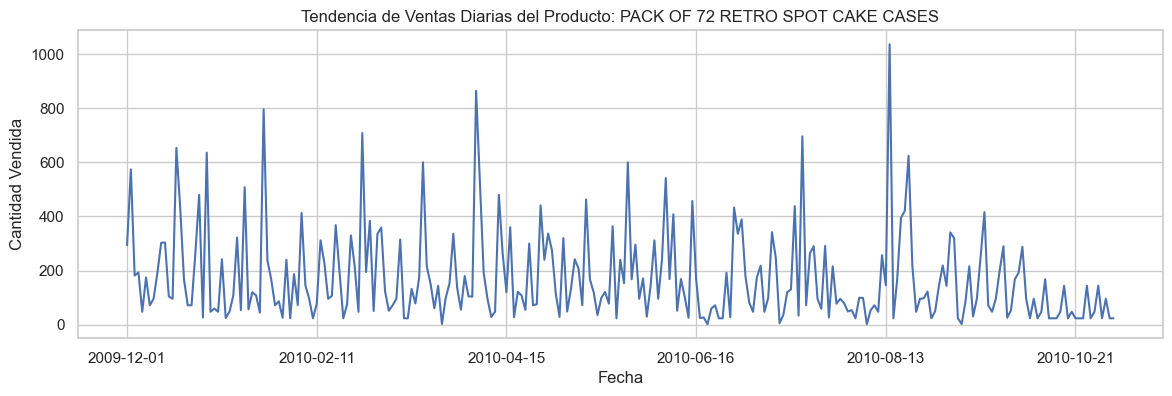

In [291]:
#Tendencias de un producto
# Seleccionar el producto más vendido
for i in range(10):
    producto_top = top_productos.index[i]

    # Filtrar ese producto
    producto_df = df[df['Description'] == producto_top]

    # Agrupar ventas por día
    ventas_producto = producto_df.groupby('Date')['Quantity'].sum()

    plt.figure(figsize=(14, 4))
    ventas_producto.plot()
    plt.title(f"Tendencia de Ventas Diarias del Producto: {producto_top}")
    plt.xlabel("Fecha")
    plt.ylabel("Cantidad Vendida")
    plt.grid(True)
    plt.show()

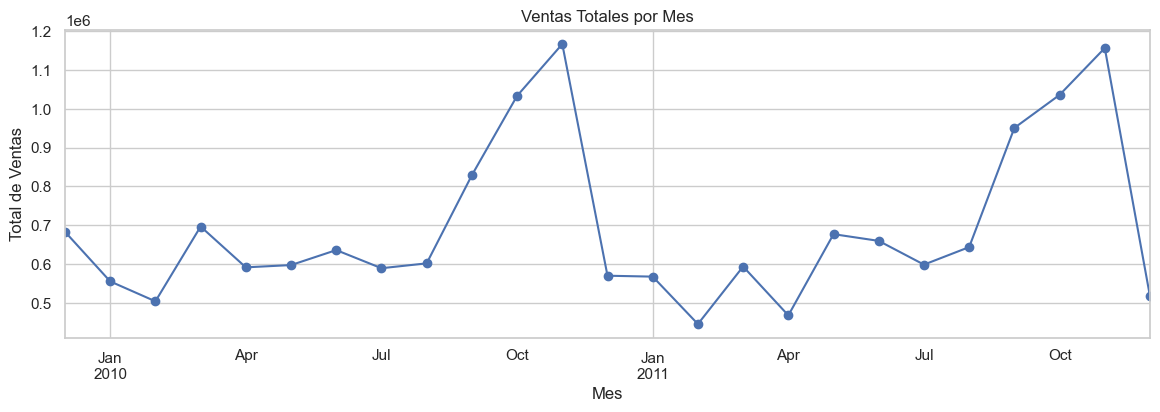

In [54]:
#Análisis por temporadas-patrones
# Extraer mes
df['Month'] = df['InvoiceDate'].dt.to_period('M')

# Agrupar ventas por mes
ventas_mensuales = df.groupby('Month')['TotalAmount'].sum()

# Visualizar
plt.figure(figsize=(14, 4))
ventas_mensuales.plot(marker='o')
plt.title("Ventas Totales por Mes")
plt.xlabel("Mes")
plt.ylabel("Total de Ventas")
plt.grid(True)
plt.show()

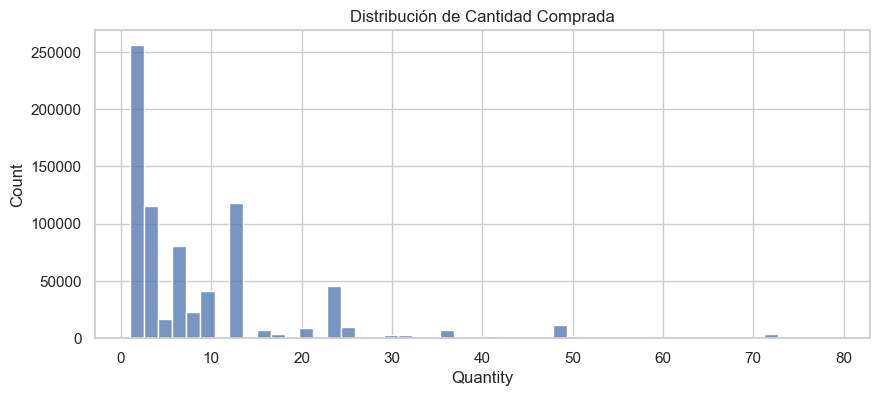

In [238]:
plt.figure(figsize=(10, 4))
sns.histplot(df[df['Quantity'] < 80]['Quantity'], bins=50)
plt.title("Distribución de Cantidad Comprada")
plt.show()

In [272]:
###experimento con librería  statsmodels...continuará
#ventas_diarias = df.groupby('InvoiceDate')['TotalAmount'].sum()
ventas_diarias=df.groupby(
                [ 'Date']
            ).agg(
                    TotalDiario=pd.NamedAgg(column='TotalAmount', aggfunc='sum')
)
ventas_diarias.index = pd.to_datetime(ventas_diarias.index)
ventas_diarias_resampled = ventas_diarias.resample('H').sum()
print(ventas_diarias.dtypes)
#print(ventas_diarias['Date'])
#ventas_diarias['Date']=pd.to_datetime(ventas_diarias['Date'])
#print(ventas_diarias.dtypes)
#print(ventas_diarias)

TotalDiario    float64
dtype: object


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


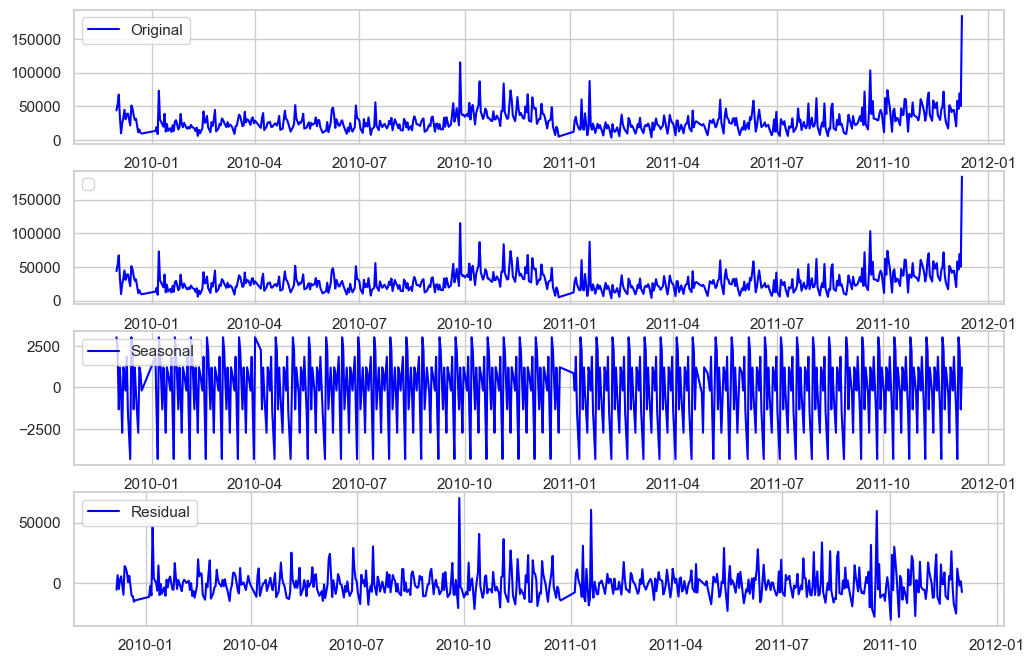

In [275]:
###>Probando librería statmodels--Modelado estad´stico (series de tiempo)
#Extract and plot trend, seasonal and residuals.
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed = seasonal_decompose(ventas_diarias['TotalDiario'],
                            model ='additive',period=12)

#Additive time series:
#Value = Base Level + Trend + Seasonality + Error
#Multiplicative Time Series:
#Value = Base Level x Trend x Seasonality x Error
trend = decomposed.trend
seasonal = decomposed.seasonal #Cyclic behavior may not be seasonal!
residual = decomposed.resid

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(ventas_diarias['TotalDiario'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(ventas_diarias['TotalDiario'], color='blue')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal', color='blue')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual', color='blue')
plt.legend(loc='upper left')
plt.show()

In [72]:
#PARTE 1: CLASIFICACIÖN DE CLIENTES opcion 1
#Clasificación por total gastado por cliente
# Agrupar por cliente y sumar TotalAmount
cliente_gasto = df.groupby('Customer ID')['TotalAmount'].sum()

# Definir umbral: top 20% como Premium 
umbral = cliente_gasto.quantile(0.80)

# Crear diccionario de clasificación
etiquetas = (cliente_gasto >= umbral).map({True: 'Premium', False: 'Normal'})

In [73]:
# Agregamos gasto total por cliente opcion 2
cliente_total = df.groupby('Customer ID')['TotalAmount'].sum().reset_index()

# Creamos etiqueta
umbral = cliente_total['TotalAmount'].quantile(0.80)
cliente_total['Clase'] = cliente_total['TotalAmount'].apply(lambda x: 'Premium' if x >= umbral else 'Normal')

# Fusionar con el dataframe original
df = df.merge(cliente_total[['Customer ID', 'Clase']], on='Customer ID')

In [79]:
#Guardar nueva bd as respaldo
nombre_archivo = 'Clientes.csv'
df.to_csv(nombre_archivo, index=False)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 779425 entries, 0 to 779424
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      779425 non-null  int64         
 1   StockCode    779425 non-null  object        
 2   Description  779425 non-null  object        
 3   Quantity     779425 non-null  int64         
 4   InvoiceDate  779425 non-null  datetime64[ns]
 5   Price        779425 non-null  float64       
 6   Customer ID  779425 non-null  float64       
 7   Country      779425 non-null  object        
 8   TotalAmount  779425 non-null  float64       
 9   Date         779425 non-null  object        
 10  Month        779425 non-null  period[M]     
 11  Clase        779425 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(5), period[M](1)
memory usage: 77.3+ MB


In [85]:
#datos para ML
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Variables numéricas agregadas por cliente
features = df.groupby('Customer ID').agg({
    'Quantity': 'sum',
    'Invoice': 'nunique',
    'Price': 'mean',
    'TotalAmount': 'sum'
}).reset_index()

# Etiquetas
features = features.merge(cliente_total[['Customer ID', 'Clase']], on='Customer ID')

# Preparar X e y
X = features[['Quantity', 'Invoice', 'Price', 'TotalAmount']]
y = features['Clase']


In [86]:
#Entrenamiento del modelo RF
# Separar datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predicciones
y_pred = clf.predict(X_test)


In [89]:
#Primera evaluación
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))



Reporte de Clasificación:
               precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       961
     Premium       1.00      1.00      1.00       215

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176

Matriz de Confusión:
 [[961   0]
 [  1 214]]


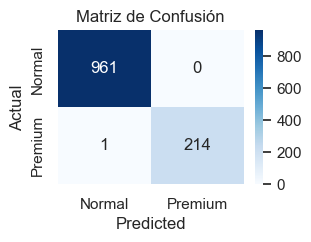

In [83]:
#Gráfico de matriz de confusión
# Etiquetas reales y predichas 
y_true = ['Normal'] * 961 + ['Premium'] * 215
y_pred = ['Normal'] * 961 + ['Normal'] * 1 + ['Premium'] * 214

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred, labels=['Normal', 'Premium'])

# Graficar
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Premium'],
            yticklabels=['Normal', 'Premium'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()


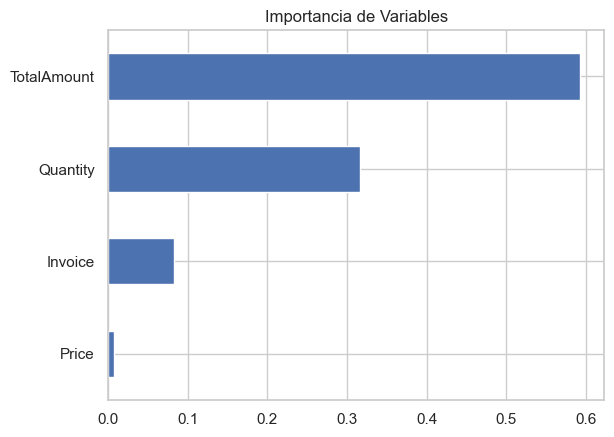

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

importancias = pd.Series(clf.feature_importances_, index=X.columns)
importancias.sort_values().plot(kind='barh', title="Importancia de Variables")
plt.show()


In [91]:
###### Parte 2: Segmentación de Clientes mediante clustering (descubrimiento de grupos)
#1. preparación de los datos

#dataframe
df['Customer ID'] = df['Customer ID'].astype(int)

# Agrupamos por cliente
cliente_df = df.groupby('Customer ID').agg({
    'Invoice': 'nunique',                 # Número de compras distintas
    'Quantity': 'sum',                    # Total de productos comprados
    'TotalAmount': ['sum', 'mean'],       # Gasto total y promedio
    'InvoiceDate': 'max',                 # Fecha de última compra (útil para RFM)
}).reset_index()

cliente_df.columns = ['CustomerID', 'Compras', 'CantidadTotal', 'GastoTotal', 'GastoPromedio', 'UltimaCompra']

In [92]:
####Parte 2
#2 Normalización de datos por sensibiliad de escalas-->K-means
from sklearn.preprocessing import StandardScaler# Transforma los datos: media = 0
# y desviación estándar = 1

# Variables para segmentar
segmentacion = cliente_df[['Compras', 'CantidadTotal', 'GastoTotal', 'GastoPromedio']]

# Normalizamos
scaler = StandardScaler()
segmentacion_scaled = scaler.fit_transform(segmentacion)


In [94]:
####Parte 2
#3 Aplicar K-Means
from sklearn.cluster import KMeans

# Eligir número clusters se quieren (ej. 3, 4, 5...)
kmeans = KMeans(n_clusters=4, random_state=42)
cliente_df['Cluster'] = kmeans.fit_predict(segmentacion_scaled)

In [95]:
####Parte 2
# 4 Perfiles de cada grupo

# Agrupar por cluster para ver características
resumen_clusters = cliente_df.groupby('Cluster').agg({
    'Compras': 'mean',
    'CantidadTotal': 'mean',
    'GastoTotal': 'mean',
    'GastoPromedio': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Número de Clientes'})

print(resumen_clusters)

            Compras  CantidadTotal     GastoTotal  GastoPromedio  \
Cluster                                                            
0          5.562436     1222.88422    2116.201679      37.258701   
1         84.404762    53671.52381   70447.316714     228.897109   
2          2.000000    80997.00000  168472.500000   56157.500000   
3        198.600000   209867.20000  382017.736000     185.740553   

         Número de Clientes  
Cluster                      
0                      5830  
1                        42  
2                         1  
3                         5  


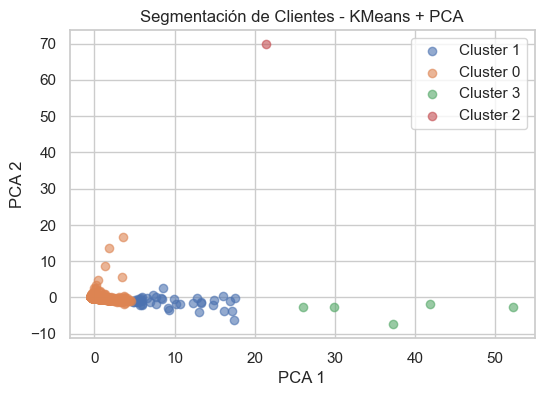

In [118]:
####Parte 2
#5 Visualizar grupos
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)#graficar en 2componentes
pca_result = pca.fit_transform(segmentacion_scaled)#transformar 4-dimen en 2 new variables
#agrega los nuevos componentes al df
cliente_df['PCA1'] = pca_result[:, 0]
cliente_df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(6, 4))#graficar dispersión de cada cluster
for c in cliente_df['Cluster'].unique():#por cada cluster seleeciona clientes-pertenecen al grupo
    cluster = cliente_df[cliente_df['Cluster'] == c]
    plt.scatter(cluster['PCA1'], cluster['PCA2'], label=f'Cluster {c}', alpha=0.6)#graficar coordenadas

plt.legend()
plt.title('Segmentación de Clientes - KMeans + PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

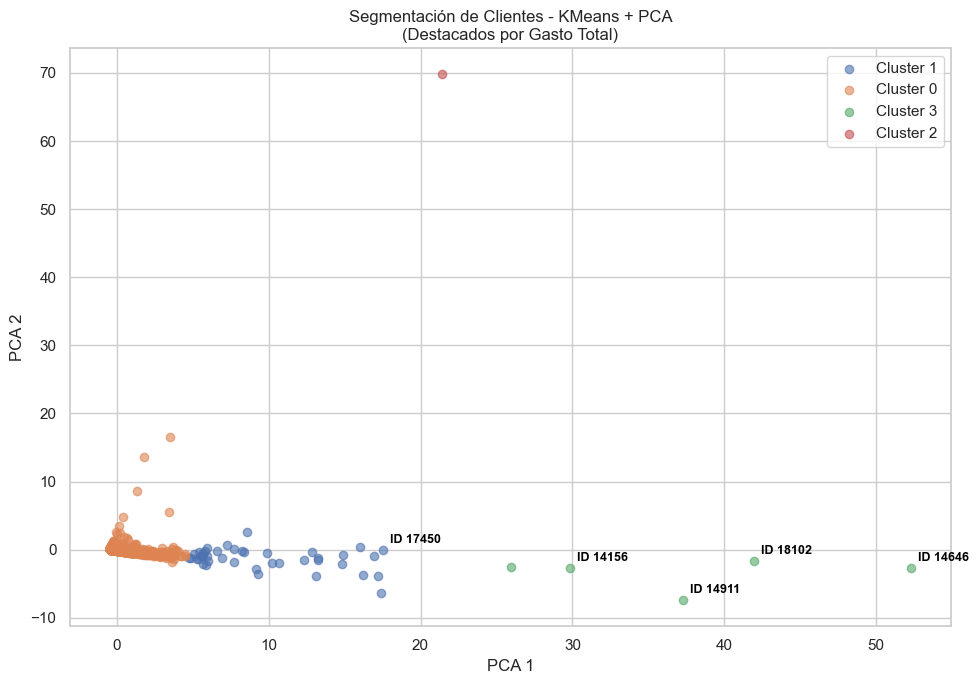

In [103]:
###Parte 2
#6-Clientes destacados
# Top 5 clientes por gasto total
top_clientes = cliente_df.sort_values(by='GastoTotal', ascending=False).head(5)
#top_clientes = cliente_df.sort_values(by='Compras', ascending=False).head(5)
#top_clientes = cliente_df.query('Cluster == 3')  # para destacar todos los del grupo 2

plt.figure(figsize=(10, 7))
for c in cliente_df['Cluster'].unique():#recorre todos los clústers únicos
    cluster = cliente_df[cliente_df['Cluster'] == c]#filtrar todos los clientes que pertenecen al cluster
    plt.scatter(cluster['PCA1'], cluster['PCA2'], label=f'Cluster {c}', alpha=0.6)#etiqueta a cada cluster

# Anotar los clientes destacados (dibujar id)
for _, row in top_clientes.iterrows():
    plt.annotate(
        f'ID {row["CustomerID"]}', 
        (row['PCA1'], row['PCA2']), 
        textcoords="offset points", 
        xytext=(5, 5), 
        ha='left', fontsize=9, fontweight='bold',
        color='black'
    )

plt.legend()
plt.title('Segmentación de Clientes - KMeans + PCA\n(Destacados por Gasto Total)')
#plt.title('Segmentación de Clientes - KMeans + PCA\n(Cluster2)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.tight_layout()
plt.show()

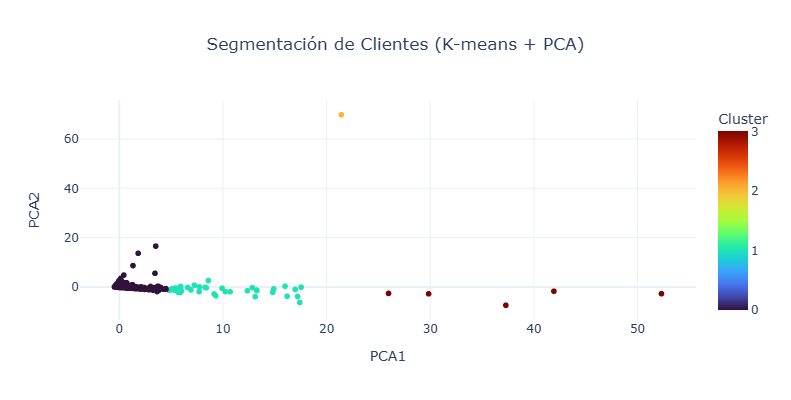

In [125]:
#version iterativa
import plotly.express as px

fig = px.scatter(
    cliente_df,
    x='PCA1',
    y='PCA2',
    color='Cluster',
    hover_data=['CustomerID', 'Compras', 'GastoTotal', 'GastoPromedio'],
    title='Segmentación de Clientes (K-means + PCA)',
    labels={'Cluster': 'Cluster'},
    color_continuous_scale='Turbo'  # Puedes usar Set1, Viridis, Plasma, etc.
)

fig.update_layout(
    width=500,
    height=400,
    legend_title_text='Clusters',
    title_x=0.5,
    template='plotly_white'
)

fig.show()

In [104]:
###Parte 2
##Mean Shift (no se requiere identifiar cluster, identifica modas o zonas densas)
from sklearn.cluster import MeanShift

# Ajustamos Mean Shift
meanshift = MeanShift()
meanshift.fit(segmentacion_scaled)

# Agregamos las etiquetas al DataFrame
cliente_df['Cluster_MS'] = meanshift.labels_

In [105]:
#analizar resultado de Mean Shift
resumen_ms = cliente_df.groupby('Cluster_MS').agg({
    'Compras': 'mean',
    'CantidadTotal': 'mean',
    'GastoTotal': 'mean',
    'GastoPromedio': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Número de Clientes'})

print(resumen_ms)


              Compras  CantidadTotal    GastoTotal  GastoPromedio  \
Cluster_MS                                                          
0            3.553179     665.774062   1135.563650      25.290195   
1           36.634615    6016.865385  11834.184615      24.591043   
2           32.538462   10659.076923  20241.409231      30.766060   
3           44.875000   12654.375000  20945.606250      31.670565   
4           54.666667   10470.555556  20974.381111      24.517010   
...               ...            ...           ...            ...   
88           1.000000   87167.000000  11880.840000     264.018667   
89           1.000000   17766.000000  10877.180000     679.823750   
90           1.000000    1404.000000   3861.000000    3861.000000   
91           1.000000     256.000000   2803.200000    2803.200000   
92           1.000000       1.000000  10953.500000   10953.500000   

            Número de Clientes  
Cluster_MS                      
0                         5143  
1  

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


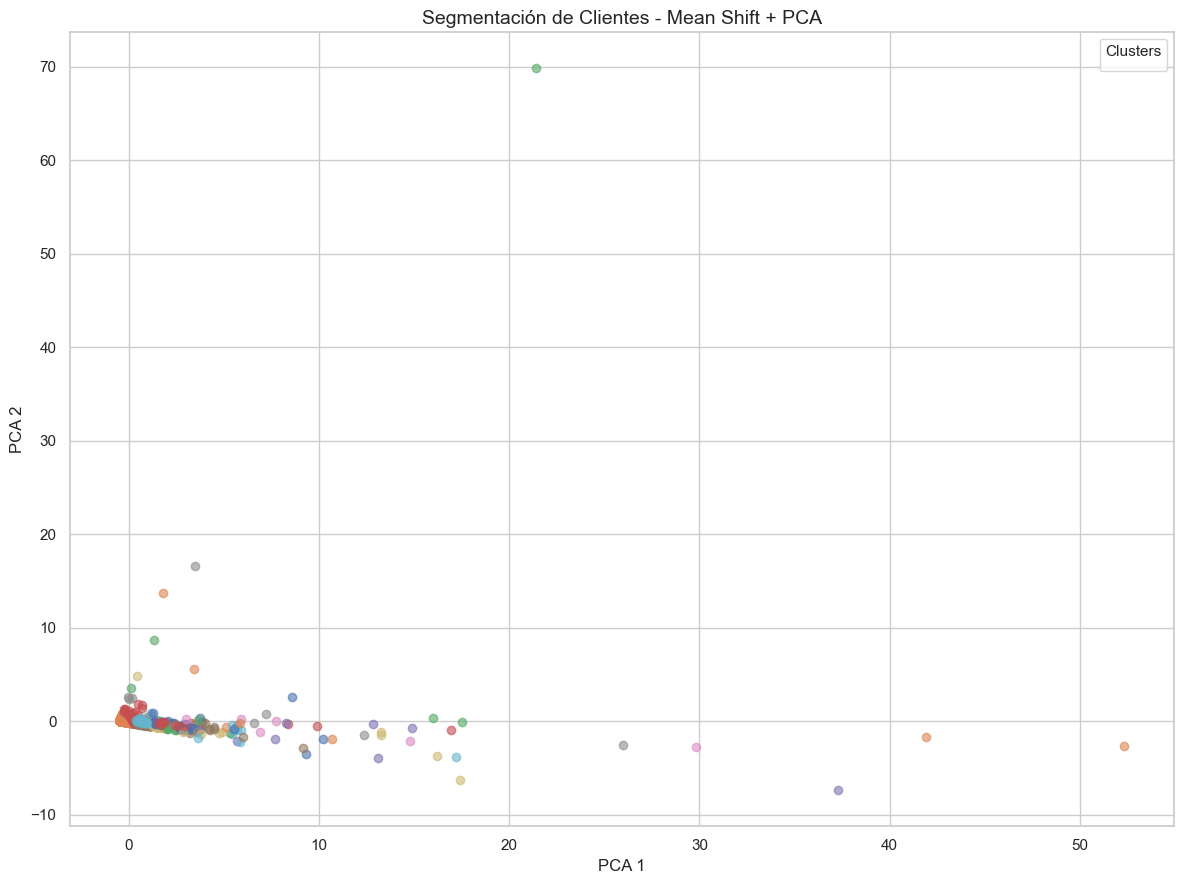

In [117]:
#Visualización de cluster con Mean Shift
#
plt.figure(figsize=(12, 9))
for c in cliente_df['Cluster_MS'].unique():
    cluster = cliente_df[cliente_df['Cluster_MS'] == c]
    #plt.scatter(cluster['PCA1'], cluster['PCA2'], label=f'MS Cluster {c}', alpha=0.6)
    plt.scatter(cluster['PCA1'], cluster['PCA2'], alpha=0.6)

plt.legend()
plt.title('Segmentación de Clientes - Mean Shift + PCA',  fontsize=14)
plt.legend(title='Clusters', fontsize=10, title_fontsize=11, loc='best')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.tight_layout()
plt.show()


In [111]:
!pip install plotly

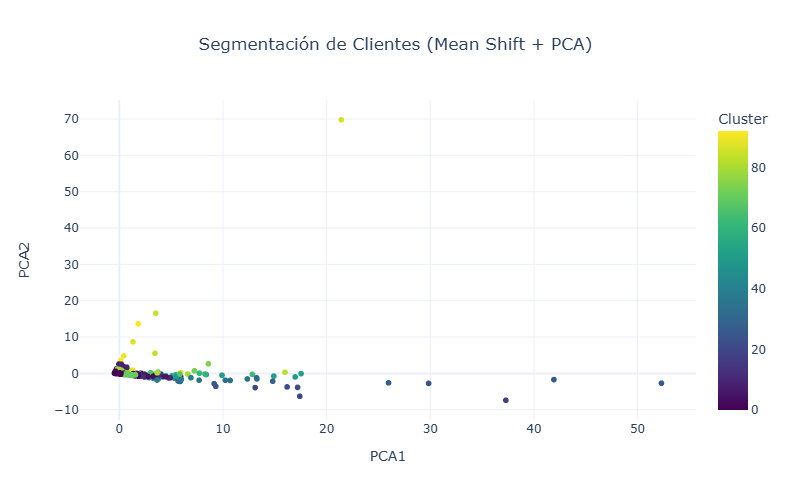

In [115]:
import plotly.express as px

fig = px.scatter(
    cliente_df,
    x='PCA1',
    y='PCA2',
    color='Cluster_MS',
    hover_data=['CustomerID', 'Compras', 'GastoTotal', 'GastoPromedio'],
    title='Segmentación de Clientes (Mean Shift + PCA)',
    labels={'Cluster_MS': 'Cluster'},
    color_continuous_scale='Viridis'  # o usa 'Set1', 'Plasma', 'Turbo', etc.
)

fig.update_layout(
    width=700,
    height=500,
    legend_title_text='Clusters',
    title_x=0.5,
    template='plotly_white'
)

fig.show()


In [126]:
####Parte 2
####Comparación de métodos
#resumen K-means
resumen_kmeans = cliente_df.groupby('Cluster').agg({
    'CustomerID': 'count',
    'Compras': 'mean',
    'CantidadTotal': 'mean',
    'GastoTotal': 'mean',
    'GastoPromedio': 'mean'
}).rename(columns={'CustomerID': 'Número de Clientes'})

resumen_kmeans.index.name = 'Cluster K-means'


In [127]:
#Resumen Mean Shift
resumen_meanshift = cliente_df.groupby('Cluster_MS').agg({
    'CustomerID': 'count',
    'Compras': 'mean',
    'CantidadTotal': 'mean',
    'GastoTotal': 'mean',
    'GastoPromedio': 'mean'
}).rename(columns={'CustomerID': 'Número de Clientes'})

resumen_meanshift.index.name = 'Cluster Mean Shift'


In [128]:
#Mostrar
print("Resumen de Clusters - K-means")
display(resumen_kmeans.round(2))

print("\nResumen de Clusters - Mean Shift")
display(resumen_meanshift.round(2))


Resumen de Clusters - K-means


Número de Clientes  Compras  CantidadTotal  GastoTotal  \
Cluster K-means                                                           
0                              5830     5.56        1222.88     2116.20   
1                                42    84.40       53671.52    70447.32   
2                                 1     2.00       80997.00   168472.50   
3                                 5   198.60      209867.20   382017.74   

                 GastoPromedio  
Cluster K-means                 
0                        37.26  
1                       228.90  
2                     56157.50  
3                       185.74


Resumen de Clusters - Mean Shift


Número de Clientes  Compras  CantidadTotal  GastoTotal  \
Cluster Mean Shift                                                           
0                                 5143     3.55         665.77     1135.56   
1                                   52    36.63        6016.87    11834.18   
2                                   13    32.54       10659.08    20241.41   
3                                    8    44.88       12654.38    20945.61   
4                                    9    54.67       10470.56    20974.38   
...                                ...      ...            ...         ...   
88                                   1     1.00       87167.00    11880.84   
89                                   1     1.00       17766.00    10877.18   
90                                   1     1.00        1404.00     3861.00   
91                                   1     1.00         256.00     2803.20   
92                                   1     1.00           1.00    10953.50   

                    GastoPromedio  
Cluster Mean Shift                 
0                           25.29  
1                           24.59  
2                           30.77  
3                           31.67  
4                           24.52  
...                           ...  
88                         264.02  
89                         679.82  
90                        3861.00  
91                        2803.20  
92                       10953.50  

[93 rows x 5 columns]

In [129]:
#número de clusters
print("K-means clusters:", cliente_df['Cluster'].nunique())
print("Mean Shift clusters:", cliente_df['Cluster_MS'].nunique())


K-means clusters: 4
Mean Shift clusters: 93


In [130]:
#tamaño de cluster
print("Distribución K-means:\n", cliente_df['Cluster'].value_counts())
print("Distribución Mean Shift:\n", cliente_df['Cluster_MS'].value_counts())


Distribución K-means:
 0    5830
1      42
3       5
2       1
Name: Cluster, dtype: int64
Distribución Mean Shift:
 0     5143
70     254
78     227
1       52
5       27
      ... 
48       1
28       1
88       1
44       1
80       1
Name: Cluster_MS, Length: 93, dtype: int64


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 779425 entries, 0 to 779424
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      779425 non-null  int64         
 1   StockCode    779425 non-null  object        
 2   Description  779425 non-null  object        
 3   Quantity     779425 non-null  int64         
 4   InvoiceDate  779425 non-null  datetime64[ns]
 5   Price        779425 non-null  float64       
 6   Customer ID  779425 non-null  int32         
 7   Country      779425 non-null  object        
 8   TotalAmount  779425 non-null  float64       
 9   Date         779425 non-null  object        
 10  Month        779425 non-null  period[M]     
 11  Clase        779425 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(5), period[M](1)
memory usage: 74.3+ MB


In [157]:
###PARTE 3 PREDICCIONES
##Regresar a la base original - Online_retail_new (unificada y limpia) 
# Cargar el archivo
df = pd.read_csv('Online_retail_new.csv', parse_dates=['InvoiceDate'])

# Verifica estructura
print(df.columns)
print(df.head())


Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'TotalAmount', 'Date'],
      dtype='object')
   Invoice StockCode                          Description  Quantity  \
0   489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1   489434    79323P                   PINK CHERRY LIGHTS        12   
2   489434    79323W                  WHITE CHERRY LIGHTS        12   
3   489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4   489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  TotalAmount  \
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom         83.4   
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom         81.0   
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom         81.0   
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom        100.8   
4 2009-12-01 07:45:00   1.25      13085.0 

In [158]:
##Creación de variable útiles nuevas
df['DiaSemana'] = df['InvoiceDate'].dt.dayofweek #extraer día de semana de la fecha de factura,retorna val 0-6 (ver q días hay más venta)
df['Mes'] = df['InvoiceDate'].dt.month #extraer mes, para detección de pratones mensuales
df['Hora'] = df['InvoiceDate'].dt.hour #extraer hora de la compra (que tiempo es mas activo mañana/tarde)
df['TemporadaAlta'] = df['Mes'].apply(lambda x: 1 if x in [11, 12] else 0) #val binaria para picos de nov-dic
df['LongitudDescripcion'] = df['Description'].astype(str).apply(len)#para identificar descripcion producto con su tamaño de caracteres
df['EsPromo'] = df['Description'].str.contains('SALE|DISCOUNT|PROMO', case=False, na=False).astype(int)#Ubicar si en descripcion de prod hay palabras relacionadas a sale/discount/promo

In [159]:
#Preparación de variables predictoras
features = [
    'Quantity', 'Price', 'DiaSemana', 'Mes', 'Hora',
    'TemporadaAlta', 'LongitudDescripcion', 'EsPromo'
]

X = df[features]
y = df['TotalAmount']

In [160]:
#División de datos para entrenar y probar (test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [161]:
##Modelo a entrenar: Random Forest to valores numéricos o continuos
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [162]:
#Evaluación de modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))# cuanto se equivoca en promedio
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))# promedio de errores al cuadrado
print("R² Score:", r2_score(y_test, y_pred))# que proporción de var de daos es explicada por model (+cercano 1 es mejor

MAE: 0.254451288449973
RMSE: 45.14782728513916
R² Score: 0.6000813696724873


In [ ]:
# 

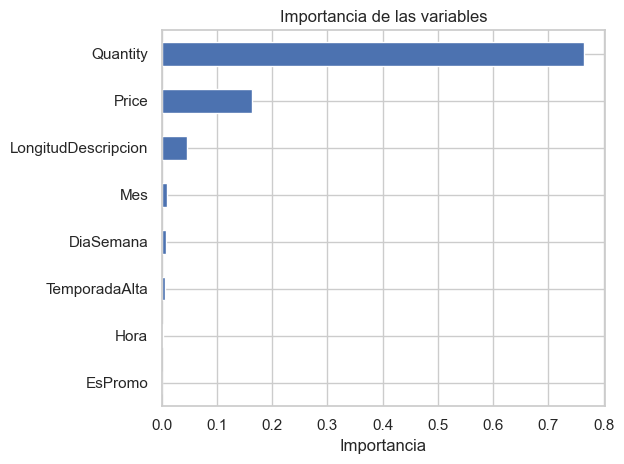

In [163]:
#Importancia de variables: ver cuales infliyen en las predicciones
import matplotlib.pyplot as plt
import pandas as pd

importancia = pd.Series(model.feature_importances_, index=features)
importancia.sort_values().plot(kind='barh', title='Importancia de las variables')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

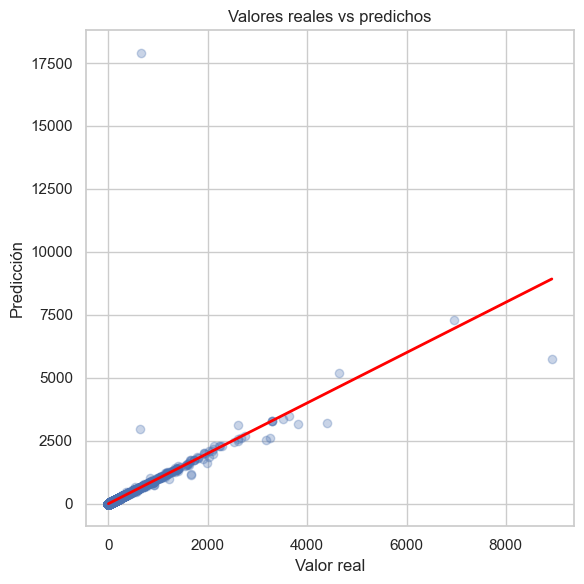

In [164]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("Valor real")
plt.ylabel("Predicción")
plt.title("Valores reales vs predichos")
plt.tight_layout()
plt.show()

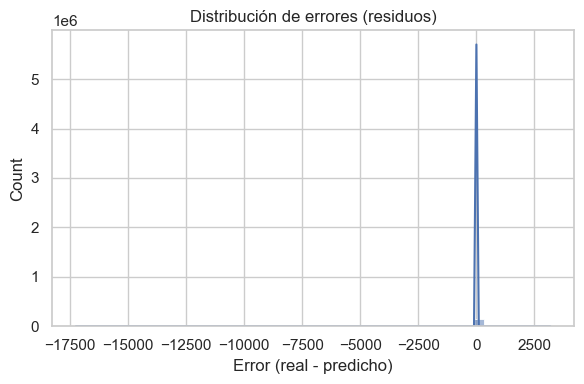

In [165]:
#Distribución de errores
errores = y_test - y_pred#calcular los errores as diferencias entre valor real y predicho
plt.figure(figsize=(6, 4))
sns.histplot(errores, bins=50, kde=True)#histograma con 50 intervalos(bins) y curva densidad 
plt.title("Distribución de errores (residuos)")
plt.xlabel("Error (real - predicho)")
plt.tight_layout()
plt.show()